# Dataset Inspection

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

FILE_PATH = './data/numbers.txt'
df = pd.read_csv(FILE_PATH, header=None)
df.head()

0    36.09
Name: 0, dtype: float64

In [9]:
df[]

TypeError: unhashable type: 'slice'

## A look at the min and max values of each column

In [5]:
df.min()

0         36.09
1         84.36
2         68.58
3         88.20
4         55.36
5         59.03
6         27.15
7         13.93
8         47.21
9         37.14
10        97.20
11        14.36
12        44.41
13        79.68
14         4.68
15        90.44
16        87.65
17        42.74
18        54.74
19        68.49
20        93.81
21        22.13
22        69.61
23        27.12
24        67.85
25        24.87
26        15.65
27         1.65
28        79.62
29        24.53
          ...  
99971     48.56
99972     24.60
99973     58.19
99974     95.41
99975     47.44
99976     38.11
99977     87.13
99978     82.47
99979     84.55
99980     43.86
99981     73.60
99982     32.27
99983     38.26
99984      7.22
99985     19.78
99986     60.13
99987     37.98
99988      5.97
99989      6.08
99990     23.05
99991     57.93
99992     56.25
99993     32.81
99994     90.31
99995     51.68
99996     36.99
99997     55.56
99998     32.99
99999     24.29
100000    59.15
Length: 100001, dtype: f

In [6]:
df.max()

0         36.09
1         84.36
2         68.58
3         88.20
4         55.36
5         59.03
6         27.15
7         13.93
8         47.21
9         37.14
10        97.20
11        14.36
12        44.41
13        79.68
14         4.68
15        90.44
16        87.65
17        42.74
18        54.74
19        68.49
20        93.81
21        22.13
22        69.61
23        27.12
24        67.85
25        24.87
26        15.65
27         1.65
28        79.62
29        24.53
          ...  
99971     48.56
99972     24.60
99973     58.19
99974     95.41
99975     47.44
99976     38.11
99977     87.13
99978     82.47
99979     84.55
99980     43.86
99981     73.60
99982     32.27
99983     38.26
99984      7.22
99985     19.78
99986     60.13
99987     37.98
99988      5.97
99989      6.08
99990     23.05
99991     57.93
99992     56.25
99993     32.81
99994     90.31
99995     51.68
99996     36.99
99997     55.56
99998     32.99
99999     24.29
100000    59.15
Length: 100001, dtype: f

The `V` values range from -113.743307 to 120.589494 and I think it makes sense to map them to the interval [-1, 1]. I don't like to use the absolute max value here, because in reality we can't know what values we have to expect in the future. Would be interesting to know whether there are min and max values on them, inducted by the procedure used to produce them, though. But I'm too lazy for that now. As a fan of geometry, I'm gonna use 180 to divide them by.

`Amount` and `Time` could also use normalization. I'm gonna use 100,000 as a max value for `Amount` and 172,800 (48 hours in seconds) for `Time`.

## Classes
### A few samples of each class

In [5]:
df = df.sort_values('Class')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
189814,128571.0,-5.809290,0.180870,-2.698260,4.886691,1.496554,1.833805,-1.417844,-6.071499,-3.150815,...,2.303073,-0.183163,0.049842,-0.220697,1.390550,1.035940,1.110960,-1.758895,0.76,0
189815,128571.0,2.136948,0.024433,-2.440339,-0.280203,0.951061,-0.799101,0.607870,-0.314005,0.054811,...,0.152297,0.488799,-0.077620,0.236435,0.479284,0.221746,-0.099236,-0.088561,3.70,0
189816,128571.0,-1.156768,0.135422,3.113868,4.420894,0.757698,1.234795,-1.234156,0.721934,-1.676275,...,0.390024,0.767668,-0.064709,0.746197,-0.080808,0.475584,0.105618,0.128784,9.81,0
189817,128571.0,1.767787,-0.301029,-2.215079,0.511939,0.423751,-0.984541,0.509947,-0.398095,0.540116,...,0.258679,0.570469,-0.257998,-0.764858,0.285443,-0.074687,-0.027915,-0.005763,174.00,0


In [6]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42741,41227.0,-9.001351,6.613284,-12.423635,7.519929,-10.266255,-2.113208,-9.984287,5.541941,-7.383705,...,1.775891,-1.224758,0.082594,0.452089,0.463827,-0.296928,0.526506,-0.450890,459.07,1
107067,70270.0,-1.512516,1.133139,-1.601052,2.813401,-2.664503,-0.310371,-1.520895,0.852996,-1.496495,...,0.729828,0.485286,0.567005,0.323586,0.040871,0.825814,0.414482,0.267265,318.11,1
10897,18690.0,-15.398845,7.472324,-19.026912,11.165526,-6.893856,-2.120937,-14.913330,-0.721214,-7.175097,...,-2.444884,0.727495,-0.345078,-0.981749,0.995271,0.816762,2.262942,-1.178063,1.00,1
191690,129371.0,1.183931,3.057250,-6.161997,5.543972,1.617041,-1.848006,-1.005508,0.339937,-2.959806,...,0.109185,-0.931072,-0.064175,-0.007013,0.345419,0.064558,0.476629,0.323740,0.00,1
231978,146998.0,-2.064240,2.629739,-0.748406,0.694992,0.418178,1.392520,-1.697801,-6.333065,1.724184,...,6.215514,-1.276909,0.459861,-1.051685,0.209178,-0.319859,0.015434,-0.050117,8.00,1


### Amount of samples in each class

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
amount_of_1s_and_0s = list(df['Class'].value_counts())
amount_of_1s_and_0s

[284315, 492]

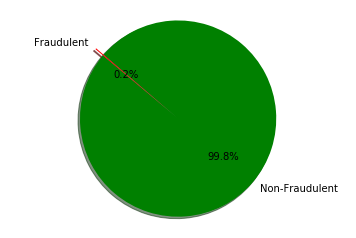

In [15]:
plt.pie(
    amount_of_1s_and_0s,
    explode=(0, 0.1),
    labels=('Non-Fraudulent', 'Fraudulent'),
    colors=['green', 'red'],
    autopct='%1.1f%%',
    shadow=True,
    startangle=140
)

plt.axis('equal')
plt.show()

It is pretty clear, that there are far more non-fraudulent examples than fraudulent, a condition that is known as the Class Imbalance Problem. I will try the recommended approach of oversampling , which means, adding duplicates of the minority class so, that the 2 classes are balanced.

## Other saliences

There are a couple of duplicate rows.

In [10]:
df['Time'].count() - df.drop_duplicates()['Time'].count()

1081

## Conclusion

At first it might make sense to try a simple, fully-connected model. But I think the `Time` column might not really be leveraged here. After all, what difference does it make how many seconds from a random point in time has passed when a transaction takes place? Thus, a better model might take the transactions into account, that have taken place _before_ the current transaction.